In [16]:
# 第一步：加载数据

from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))

8982


In [17]:
# 将编码成数字序列的信息解码
def get_num2word_dict():
    word2num_dict = reuters.get_word_index()
    num2word_dict={}
    for key,value in word2num_dict.items():
        num2word_dict[value] = key
    return num2word_dict

def decoder_num2word(num_sequence):
    num2word_dict = get_num2word_dict()
    text = ""
    for i in num_sequence:
        text = text + ' ' + num2word_dict.get(i-3,'?')
    return text

In [18]:
# 第二步：准备数据（train_data向量化，train_labels变成one-hot）
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        result[i,sequence] = 1
    return result
def onehot_transfer(labels,category=46):
    result = np.zeros((len(labels),category))
    for i,label in enumerate(labels):
        result[i,label] = 1
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# y_train = onehot_transfer(train_labels)
# y_test = onehot_transfer(test_labels)

# one-hot transfer can be finished with keras internal function
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [19]:
# 第三步：构建模型及编译
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
# 第四步：训练模型

# 验证集
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]
partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

# 训练
history = model.fit(partial_x_train,partial_y_train,batch_size=512,epochs=20,validation_data=(x_val,y_val))



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 114us/step - loss: 2.5201 - accuracy: 0.5175 - val_loss: 1.6696 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 92us/step - loss: 1.3838 - accuracy: 0.7126 - val_loss: 1.2871 - val_accuracy: 0.7270
Epoch 3/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.0359 - accuracy: 0.7814 - val_loss: 1.1323 - val_accuracy: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.8216 - accuracy: 0.8242 - val_loss: 1.0303 - val_accuracy: 0.7960
Epoch 5/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.6510 - accuracy: 0.8642 - val_loss: 0.9727 - val_accuracy: 0.8090
Epoch 6/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.5203 - accuracy: 0.8913 - val_loss: 0.9314 - val_accuracy: 0.8190
Epoch 7/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.41

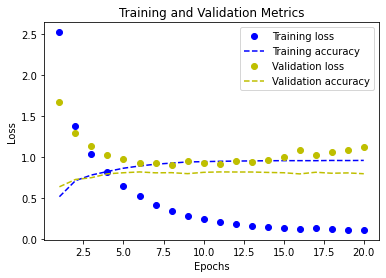

In [23]:
# 画图显示模型训练效果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,accu,'b--',label='Training accuracy')
plt.plot(epochs,val_loss,'yo',label='Validation loss')
plt.plot(epochs,val_accu,'y--',label='Validation accuracy')

plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
# 第五步：预测
prediction = model.predict(x_test)

np.argmax(prediction[0])

3

In [ ]:
# 补充一点：怎样求完全随机分类的精度（因为只有你的算法分类效果好于完全随机分类的精度，才说明算法是有效的。）
import copy
import numpy as np

test_labels_copy = copy.copy(test_labels) # 在复制的数据上进行操作，这样可以不改变原数据
np.random.shuffle(test_labels_copy) # 随机打乱
hits_array = (np.array(test_labels_copy) == test_labels) # 生成一个数组hits_array,在其中的每一个位置上，如果原标签和随机打乱后的标签是一样的，就填入1，否则填入0
float(np.sum(hits_array)/len(hits_array)) # 统计“命中率”